# Homework 4


### Due: Thursday Nov 2, at 11:59pm via Blackboard

Q1. Import the necessary panda libraries (1 point)

In [2]:
import numpy as np 
import pandas as pd 
import datetime 
import yfinance as yf
from pandas_datareader import data as pdr

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
import random

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Q2A. Using Yahoo Finance import the stock data for Meta and Tesla from 2021-1-1 to 2023-1-1. Show your code (1 point)

In [3]:
yf.pdr_override()
meta = pdr.get_data_yahoo("META", 
                       start="2021-1-1", 
                       end="2023-1-1")
tesla = pdr.get_data_yahoo("TSLA", 
                       start="2021-1-1", 
                       end="2023-1-1")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Q2B. Create the data frames for the Meta and Tesla date, parsing the Date variable as dates and changing the index column to Date. (1 point)

In [4]:
meta = pd.DataFrame(meta)
meta.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600
2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100
2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300


In [5]:
tesla = pd.DataFrame(tesla)
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500


Q3. Merge the stock data for Meta and Tesla stock data. Include the necessary prefixes (2 points)

In [6]:
merge = meta.merge(tesla, on="Date", suffixes = ("_meta", "_tsla"))
merge.head()

,Open_meta,High_meta,Low_meta,Close_meta,Adj Close_meta,Volume_meta,Open_tsla,High_tsla,Low_tsla,Close_tsla,Adj Close_tsla,Volume_tsla
Date,,,,,,,,,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300,285.333344,294.829987,279.463318,293.339996,293.339996,225166500


Q4a. Report the summary statistics for the Adjusted close for Tesla and Meta stocks prices. (1 point)

In [7]:
adjusted = merge[["Adj Close_tsla", "Adj Close_meta"]].describe()
adjusted

,Adj Close_tsla,Adj Close_meta
count,503.000000,503.000000
mean,261.542545,250.817098
std,55.775860,84.762832
min,109.099998,88.910004
25%,223.201668,170.205002
50%,251.213333,265.739990
75%,296.856659,330.300003
max,409.970001,382.179993


Q4b: What are the Ranges and Interquartile Ranges for the Adjusted Close of Tesla and Meta Stock prices? (1 point)

In [9]:
teslaRange = merge["Adj Close_tsla"].max() - merge["Adj Close_tsla"].min()
teslaRange

300.87000274658203

In [10]:
metaRange = merge["Adj Close_meta"].max() - merge["Adj Close_meta"].min()
metaRange

293.2699890136719

In [11]:
teslaIQR = merge[ "Adj Close_tsla"].quantile(0.75) - merge[ "Adj Close_tsla"].quantile(0.25)
teslaIQR

73.65499114990234

In [12]:
metaIQR = merge["Adj Close_meta"].quantile(0.75) - merge["Adj Close_meta"].quantile(0.25)
metaIQR 

160.09500122070312

Q5. Plot line graphs for the daily volumes for Meta and Tesla Stock and include the title and labels. Which stock had greater volumn volatility? (2 points)

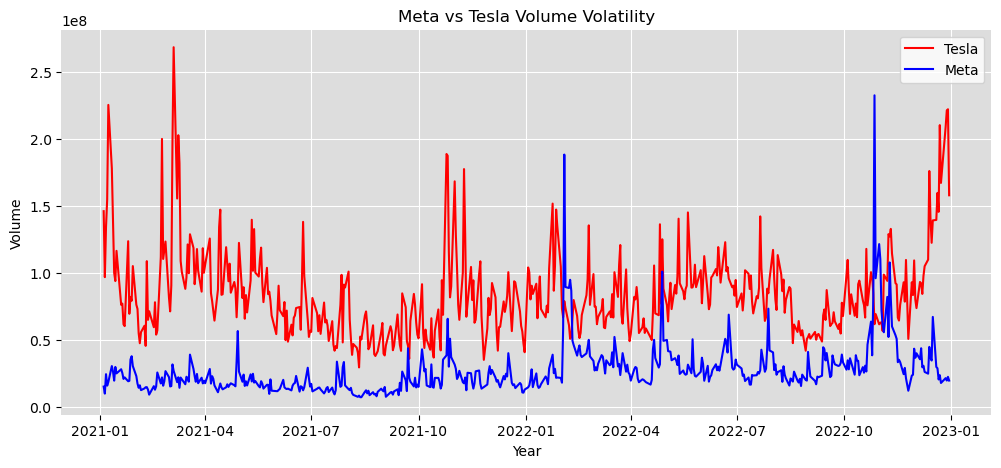

In [20]:
plt.figure(figsize = (12, 5))

sns.lineplot(data = merge, 
             x = "Date", 
             y = "Volume_tsla", 
             color = "red",label="Tesla")

sns.lineplot(data = merge, 
             x = "Date", 
             y = "Volume_meta",
             color = "blue",label="Meta")

plt.ylabel("Volume")
plt.xlabel("Year")
plt.title("Meta vs Tesla Volume Volatility")
plt.grid(color="White")
plt.gca().set_facecolor("#DDDDDD")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)


In [ ]:
Meta stock had greater volume volatility. 

Q6. Create a new variables for both Tesla and Meta stocks in the dataframe that measures the daily differential in price, defined as the difference between the High Price and Low Price for the day (1 point)

In [14]:
merge["PriceDiff_tsla"] = merge["High_tsla"] - merge["Low_tsla"]

merge["PriceDiff_meta"] = merge["High_meta"] - merge["Low_meta"]

merge.head()


,Open_tsla,High_tsla,Low_tsla,Close_tsla,Adj Close_tsla,Volume_tsla,Open_meta,High_meta,Low_meta,Close_meta,Adj Close_meta,Volume_meta,PriceDiff_tsla,PriceDiff_meta
Date,,,,,,,,,,,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,9.799988,9.099991
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,4.190002,7.213333
2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,7.739990,8.300003
2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,6.829987,13.929993
2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,5.770020,15.366669


Q7. Resample the data to create the average monthly price diffferences between Tesla and Meta Stock. (2 points)

In [66]:
resamp = merge[["PriceDiff_tsla","PriceDiff_meta"]].resample("M").mean()
resamp.head()

,PriceDiff_tsla,PriceDiff_meta
Date,,
2021-01-31,8.803686,11.362281
2021-02-28,6.808423,12.744733
2021-03-31,8.769563,14.384638
2021-04-30,6.107147,9.516985
2021-05-31,6.550000,8.813497


Q8. Using Plotly, create line graphs for the monthly price differences for Tesla and Meta stocks. Include the range slider. Don't show the gridlines but include the title and labels (3 points)

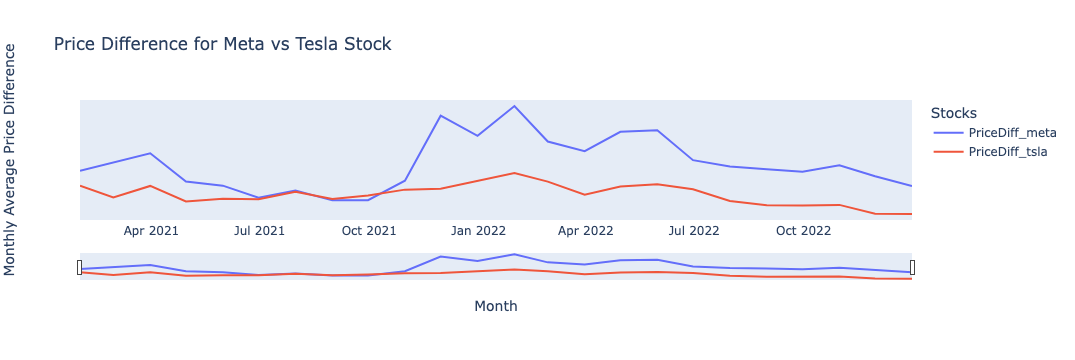

In [74]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=resamp.index, y=resamp["PriceDiff_meta"],mode="lines",name="PriceDiff_meta"))
                    
fig.add_trace(go.Scatter(x=resamp.index, y=resamp["PriceDiff_tsla"],
                    mode="lines",
                    name="PriceDiff_tsla"))

fig.update_xaxes(rangeslider_visible = True)

fig.update_layout(xaxis=dict(showline=True,showgrid=False),
  yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False),
  legend=dict(title="Stocks"),)
                                  
                                   
fig.update_layout(title= "Price Difference for Meta vs Tesla Stock",
                  xaxis_title="Month",
                  yaxis_title="Monthly Average Price Difference")                     
